In [1]:
import numpy as np
import pylab
import sklearn
from sklearn.metrics import pairwise_distances
from sklearn import preprocessing
from sklearn.neighbors import kneighbors_graph
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.manifold import TSNE
import random
from random import sample
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.animation
import pandas as pd
import ot
import ot.plot
import scipy as sp
from scipy.sparse.csgraph import dijkstra
from scipy.sparse import csr_matrix
import timeit
import pandas as pd
import umap

In [2]:
run avida-umap.py

In [3]:
import sys
sys.path.insert(1,'data/SCOT/src')

import scot2 as sc
import utils as ut
import evals as evals

In [4]:
from pamona import Pamona
import pamona

## scGEM

In [5]:
X=np.genfromtxt("./data/SCOT/data/scGEM_methylation.csv", delimiter=",")
y=np.genfromtxt("./data/SCOT/data/scGEM_expression.csv", delimiter=",")
print("Dimensions of input datasets are: ", "X= ", X.shape, " Y= ", y.shape)
(n1,d1)=X.shape
(n2,d2)=y.shape
our_normalize=1
reducer = umap.UMAP(n_neighbors=25,min_dist=0.2)

# initialize SCOT object
scot=sc.SCOT(X, y)
# call the alignment with z-score normalization 
X_new, y_new = scot.align( k=35, e=5e-3,  normalize=True, norm="l2")

data_all = np.concatenate((X_new,y_new[0]))
scot_umap = reducer.fit_transform(data_all)

scot_X_umap=scot_umap[0: 177,]
scot_y_umap=scot_umap[177:,]

Pa = Pamona.Pamona(n_shared=[n1], Lambda=1, output_dim=2)

integrated_data_old, T = Pa.run_Pamona([X, y])
id_temp = np.concatenate((integrated_data_old[0],integrated_data_old[1]),axis=0)
integrated_data_umap = reducer.fit_transform(id_temp)
integrated_data = [integrated_data_umap[0:177,:],integrated_data_umap[177:,:]]


# transport every iter
Y1, Y2 = integrate_umap_gw(X,y,alpha=0.8,n_neighbors=25,min_dist=0.2,normalize=our_normalize,graph_dist=True,our_log=False)

Dimensions of input datasets are:  X=  (177, 27)  Y=  (177, 34)
It.  |Err         
-------------------
    0|5.587079e-03|
   10|7.742081e-05|
   20|6.302990e-06|
   30|7.716994e-07|
   40|9.942395e-08|
   50|1.301204e-08|
   60|1.712430e-09|
   70|2.258163e-10|
Pamona start!
use random seed: 666
Epoch.|Loss        
-------------------
    0|1.111624e-02|
   10|1.062914e-03|
   20|3.058663e-04|
   30|2.244015e-04|
   40|2.547553e-04|
   50|1.336733e-04|
   60|4.189853e-05|
   70|1.260156e-05|
   80|3.839052e-06|
   90|1.171103e-06|
  100|3.567226e-07|
  110|1.085313e-07|
  120|3.299822e-08|
  130|1.002945e-08|
  140|3.047810e-09|
  150|9.261056e-10|
Pamona Done! takes 26.565979 seconds
It.  |Err         
-------------------
    0|6.141575e-03|
   10|1.146959e-02|
   20|4.313676e-03|
   30|1.388706e-03|
   40|2.440838e-04|
   50|6.689721e-05|
0.0548229196352711
It.  |Err         
-------------------
    0|6.951099e-03|
   10|3.354701e-03|
   20|1.632016e-03|
   30|7.596975e-04|
   40|1.

Text(0.5, 1.0, 'Pamona: Colored based on cell')

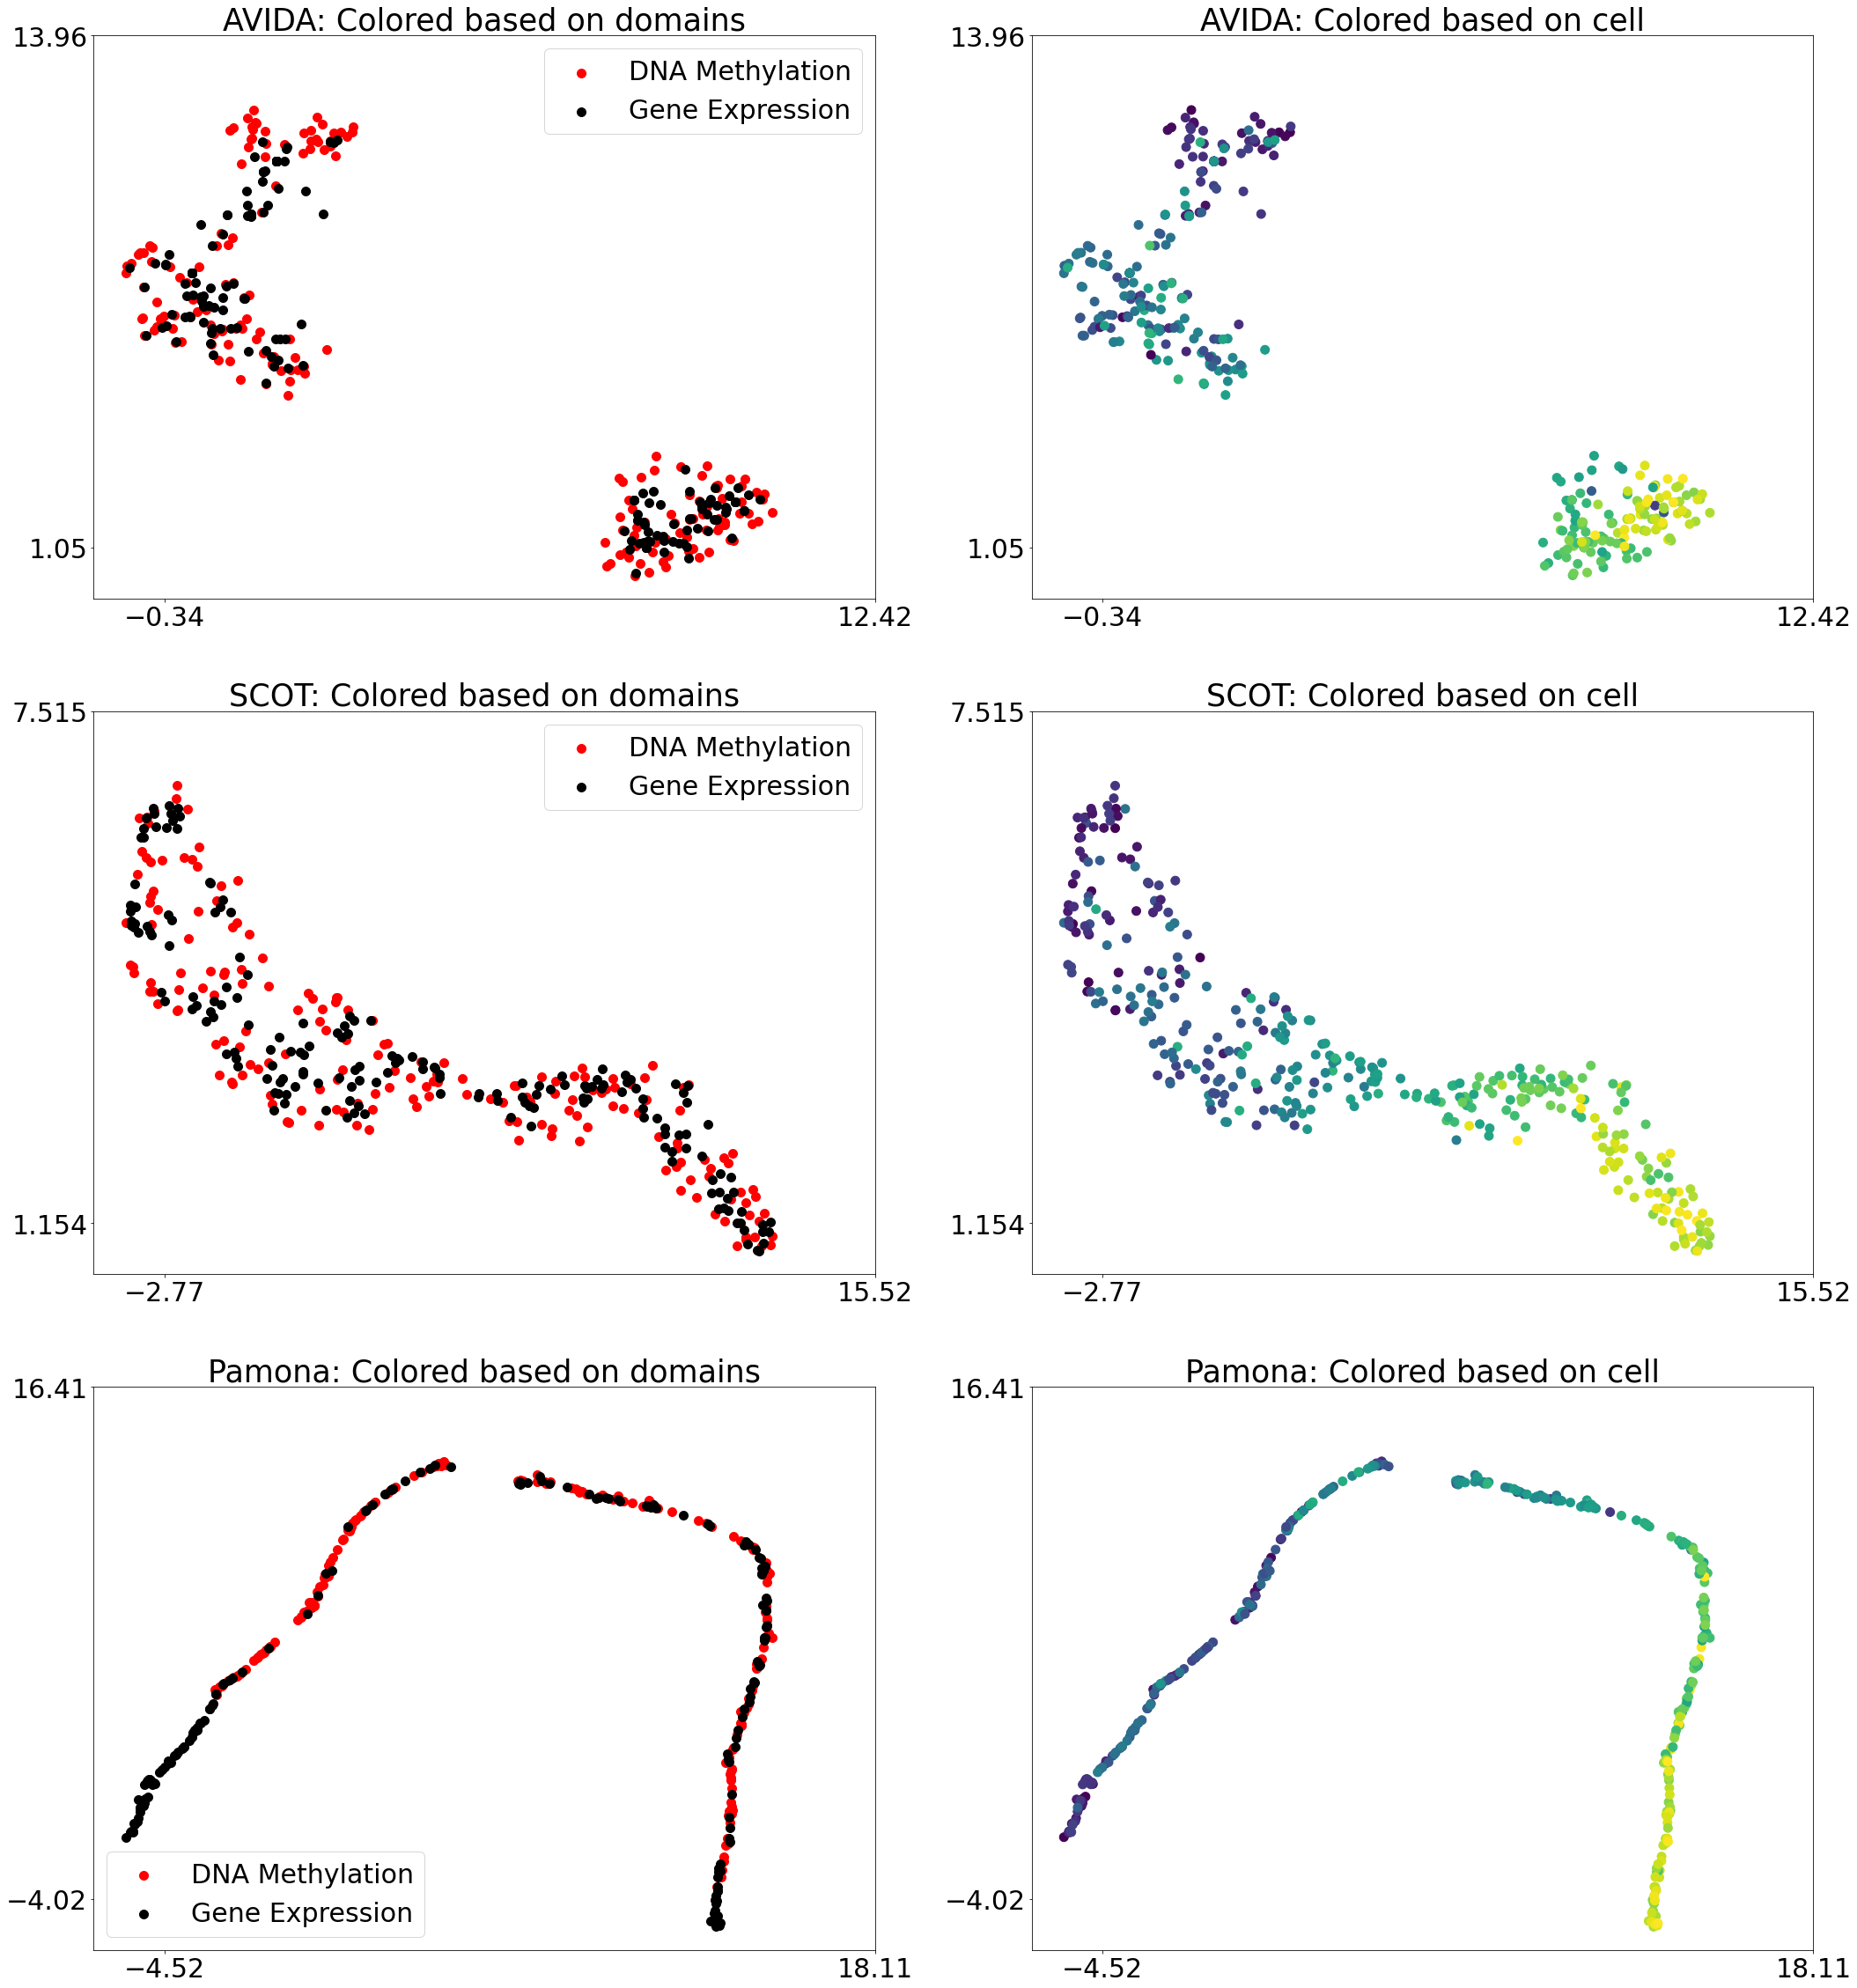

In [6]:
tick_font_size=30
title_font_size=35
dot_size = 100
legend_font=30

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(35, 40)

basic_labels1 = np.arange(start=0.0,stop=1.0,step=1./n1)
basic_labels2 = np.arange(start=0.0,stop=1.0,step=1./n2)

axs[0,0].scatter(Y2[:,0],Y2[:,1],c='r',s=dot_size,label='DNA Methylation')
axs[0,0].scatter(Y1[:,0],Y1[:,1],c='k',s=dot_size,label='Gene Expression')
start_x, end_x = axs[0,0].get_xlim()
start_y, end_y = axs[0,0].get_ylim()
step_size_x = (end_x-start_x)
step_size_y = (end_y-start_y)
axs[0,0].xaxis.set_ticks(np.arange((start_x+step_size_x/10), (end_x+5), step_size_x))
axs[0,0].yaxis.set_ticks(np.arange((start_y+step_size_y/10), (end_y+5), step_size_y))
for label in (axs[0,0].get_xticklabels() + axs[0,0].get_yticklabels()):
	label.set_fontsize(tick_font_size)
axs[0,0].legend(prop={'size':legend_font})
axs[0,0].set_title("AVIDA: Colored based on domains",fontsize=title_font_size)

axs[0,1].scatter(Y2[:,0],Y2[:,1],c=basic_labels2,s=dot_size)
axs[0,1].scatter(Y1[:,0],Y1[:,1],c=basic_labels1,s=dot_size)
start_x, end_x = axs[0,1].get_xlim()
start_y, end_y = axs[0,1].get_ylim()
step_size_x = (end_x-start_x)
step_size_y = (end_y-start_y)
axs[0,1].xaxis.set_ticks(np.arange((start_x+step_size_x/10), (end_x+5), step_size_x))
axs[0,1].yaxis.set_ticks(np.arange((start_y+step_size_y/10), (end_y+5), step_size_y))
for label in (axs[0,1].get_xticklabels() + axs[0,1].get_yticklabels()):
	label.set_fontsize(tick_font_size)
#axs[0,1].legend()
axs[0,1].set_title("AVIDA: Colored based on cell",fontsize=title_font_size)

axs[1,0].scatter(scot_X_umap[:,0],scot_X_umap[:,1],c='r',s=dot_size,label='DNA Methylation')
axs[1,0].scatter(scot_y_umap[:,0],scot_y_umap[:,1],c='k',s=dot_size,label='Gene Expression')
start_x, end_x = axs[1,0].get_xlim()
start_y, end_y = axs[1,0].get_ylim()
step_size_x = (end_x-start_x)
step_size_y = (end_y-start_y)
axs[1,0].xaxis.set_ticks(np.arange((start_x+step_size_x/10), (end_x+5), step_size_x))
axs[1,0].yaxis.set_ticks(np.arange((start_y+step_size_y/10), (end_y+5), step_size_y))
for label in (axs[1,0].get_xticklabels() + axs[1,0].get_yticklabels()):
	label.set_fontsize(tick_font_size)
axs[1,0].legend(prop={'size':legend_font})
axs[1,0].set_title("SCOT: Colored based on domains",fontsize=title_font_size)

axs[1,1].scatter(scot_X_umap[:,0],scot_X_umap[:,1],c=basic_labels1,s=dot_size)
axs[1,1].scatter(scot_y_umap[:,0],scot_y_umap[:,1],c=basic_labels2,s=dot_size)
start_x, end_x = axs[1,1].get_xlim()
start_y, end_y = axs[1,1].get_ylim()
step_size_x = (end_x-start_x)
step_size_y = (end_y-start_y)
axs[1,1].xaxis.set_ticks(np.arange((start_x+step_size_x/10), (end_x+5), step_size_x))
axs[1,1].yaxis.set_ticks(np.arange((start_y+step_size_y/10), (end_y+5), step_size_y))
for label in (axs[1,1].get_xticklabels() + axs[1,1].get_yticklabels()):
	label.set_fontsize(tick_font_size)
#axs[1,1].legend()
axs[1,1].set_title("SCOT: Colored based on cell",fontsize=title_font_size)

axs[2,0].scatter(integrated_data[0][:,0],integrated_data[0][:,1],c='r',s=dot_size,label='DNA Methylation')
axs[2,0].scatter(integrated_data[1][:,0],integrated_data[1][:,1],c='k',s=dot_size,label='Gene Expression')
start_x, end_x = axs[2,0].get_xlim()
start_y, end_y = axs[2,0].get_ylim()
step_size_x = (end_x-start_x)
step_size_y = (end_y-start_y)
axs[2,0].xaxis.set_ticks(np.arange((start_x+step_size_x/10), (end_x+step_size_x/5), step_size_x))
axs[2,0].yaxis.set_ticks(np.arange((start_y+step_size_y/10), (end_y+step_size_y/5), step_size_y))
for label in (axs[2,0].get_xticklabels() + axs[2,0].get_yticklabels()):
	label.set_fontsize(tick_font_size)
axs[2,0].legend(prop={'size':legend_font})
axs[2,0].set_title("Pamona: Colored based on domains",fontsize=title_font_size)

axs[2,1].scatter(integrated_data[0][:,0],integrated_data[0][:,1],c=basic_labels1,s=dot_size)
axs[2,1].scatter(integrated_data[1][:,0],integrated_data[1][:,1],c=basic_labels2,s=dot_size)
start_x, end_x = axs[2,1].get_xlim()
start_y, end_y = axs[2,1].get_ylim()
step_size_x = (end_x-start_x)
step_size_y = (end_y-start_y)
axs[2,1].xaxis.set_ticks(np.arange((start_x+step_size_x/10), (end_x+step_size_x/5), step_size_x))
axs[2,1].yaxis.set_ticks(np.arange((start_y+step_size_y/10), (end_y+step_size_y/5), step_size_y))
for label in (axs[2,1].get_xticklabels() + axs[2,1].get_yticklabels()):
	label.set_fontsize(tick_font_size)
#axs[2,1].legend()
axs[2,1].set_title("Pamona: Colored based on cell",fontsize=title_font_size)

## Distant Rings

In [8]:
def circle(n, r, sigma):
    theta = np.random.rand(n) * 2 * np.pi
    radius = np.random.randn(n) * sigma + r
    X = np.empty([n,2])
    X[:,0] = np.cos(theta) * radius
    X[:,1] = np.sin(theta) * radius
    return X

n = 200
m = 200
np.random.seed(547)

our_normalize=0

r1 = 5
r2 = 5

sigma1 = 1
sigma2 = 0.1 

center2 = 100

circle1 = circle(100,r1,sigma1)
circle2 = circle(100,r2,sigma2) + center2

X1 = np.zeros([n,2])
X1[:100,:] = circle1
X1[100:,:] = circle2

X2 = np.zeros([m,2])
X2[:100,:] = circle1
X2[100:,:] = circle2

labels_1 = np.zeros(m)
labels_1[100:] = np.ones(100)
labels_2 = np.zeros(n)
labels_2[100:] = np.ones(100)
reducer = umap.UMAP(n_neighbors=50,min_dist=0.3)

# initialize SCOT object
scot=sc.SCOT(X1, X2)
# call the alignment with z-score normalization 
X_new, y_new = scot.align( k=35, e=5e-3,  normalize=True, norm="l2")

data_all = np.concatenate((X_new,y_new[0]))
scot_umap = reducer.fit_transform(data_all)
scot_X_umap=scot_umap[0:200,]
scot_y_umap=scot_umap[200:,]

Pa = Pamona.Pamona(n_shared=[200], Lambda=1, output_dim=2)

integrated_data_old, T = Pa.run_Pamona([X1, X2])
id_temp = np.concatenate((integrated_data_old[0],integrated_data_old[1]),axis=0)
integrated_data_umap = reducer.fit_transform(id_temp)
integrated_data = [integrated_data_umap[0:200,:],integrated_data_umap[200:,:]]

Y1, Y2 = integrate_umap_gw(X1,X2,alpha=0.9,normalize=our_normalize,n_neighbors=50,min_dist=0.2,visualize=0,labels1=labels_1,labels2=labels_2,graph_dist=True,our_log=False)

tY1 = reducer.fit_transform(X1)
tY2 = reducer.fit_transform(X2)

It.  |Err         
-------------------
    0|4.690917e-03|
   10|1.551589e-04|
   20|2.699032e-10|
Pamona start!
use random seed: 666
Epoch.|Loss        
-------------------
    0|1.557800e-02|
   10|9.106506e-05|
   20|7.461270e-06|
   30|4.760983e-07|
   40|2.983868e-08|
   50|1.867975e-09|
   60|1.169318e-10|
Pamona Done! takes 0.966066 seconds
It.  |Err         
-------------------
    0|5.629178e-03|
   10|6.187376e-03|
   20|1.150604e-03|
   30|1.517451e-04|
   40|8.828177e-05|
0.03733524342756754
It.  |Err         
-------------------
    0|6.343870e-03|
   10|2.248708e-02|
   20|2.283395e-02|
   30|2.314086e-02|
   40|2.320668e-02|
   50|2.324863e-02|
   60|2.327281e-02|
   70|2.328725e-02|
   80|2.329798e-02|
   90|2.330783e-02|
  100|2.331769e-02|
  110|2.332750e-02|
  120|2.333688e-02|
  130|2.334544e-02|
  140|2.335296e-02|
  150|2.335939e-02|
  160|2.336481e-02|
  170|2.336934e-02|
  180|2.337312e-02|
  190|2.337626e-02|
0.0699733187051553
It.  |Err         
--------------

Text(0.5, 1.0, 'Pamona: Colored by Domain')

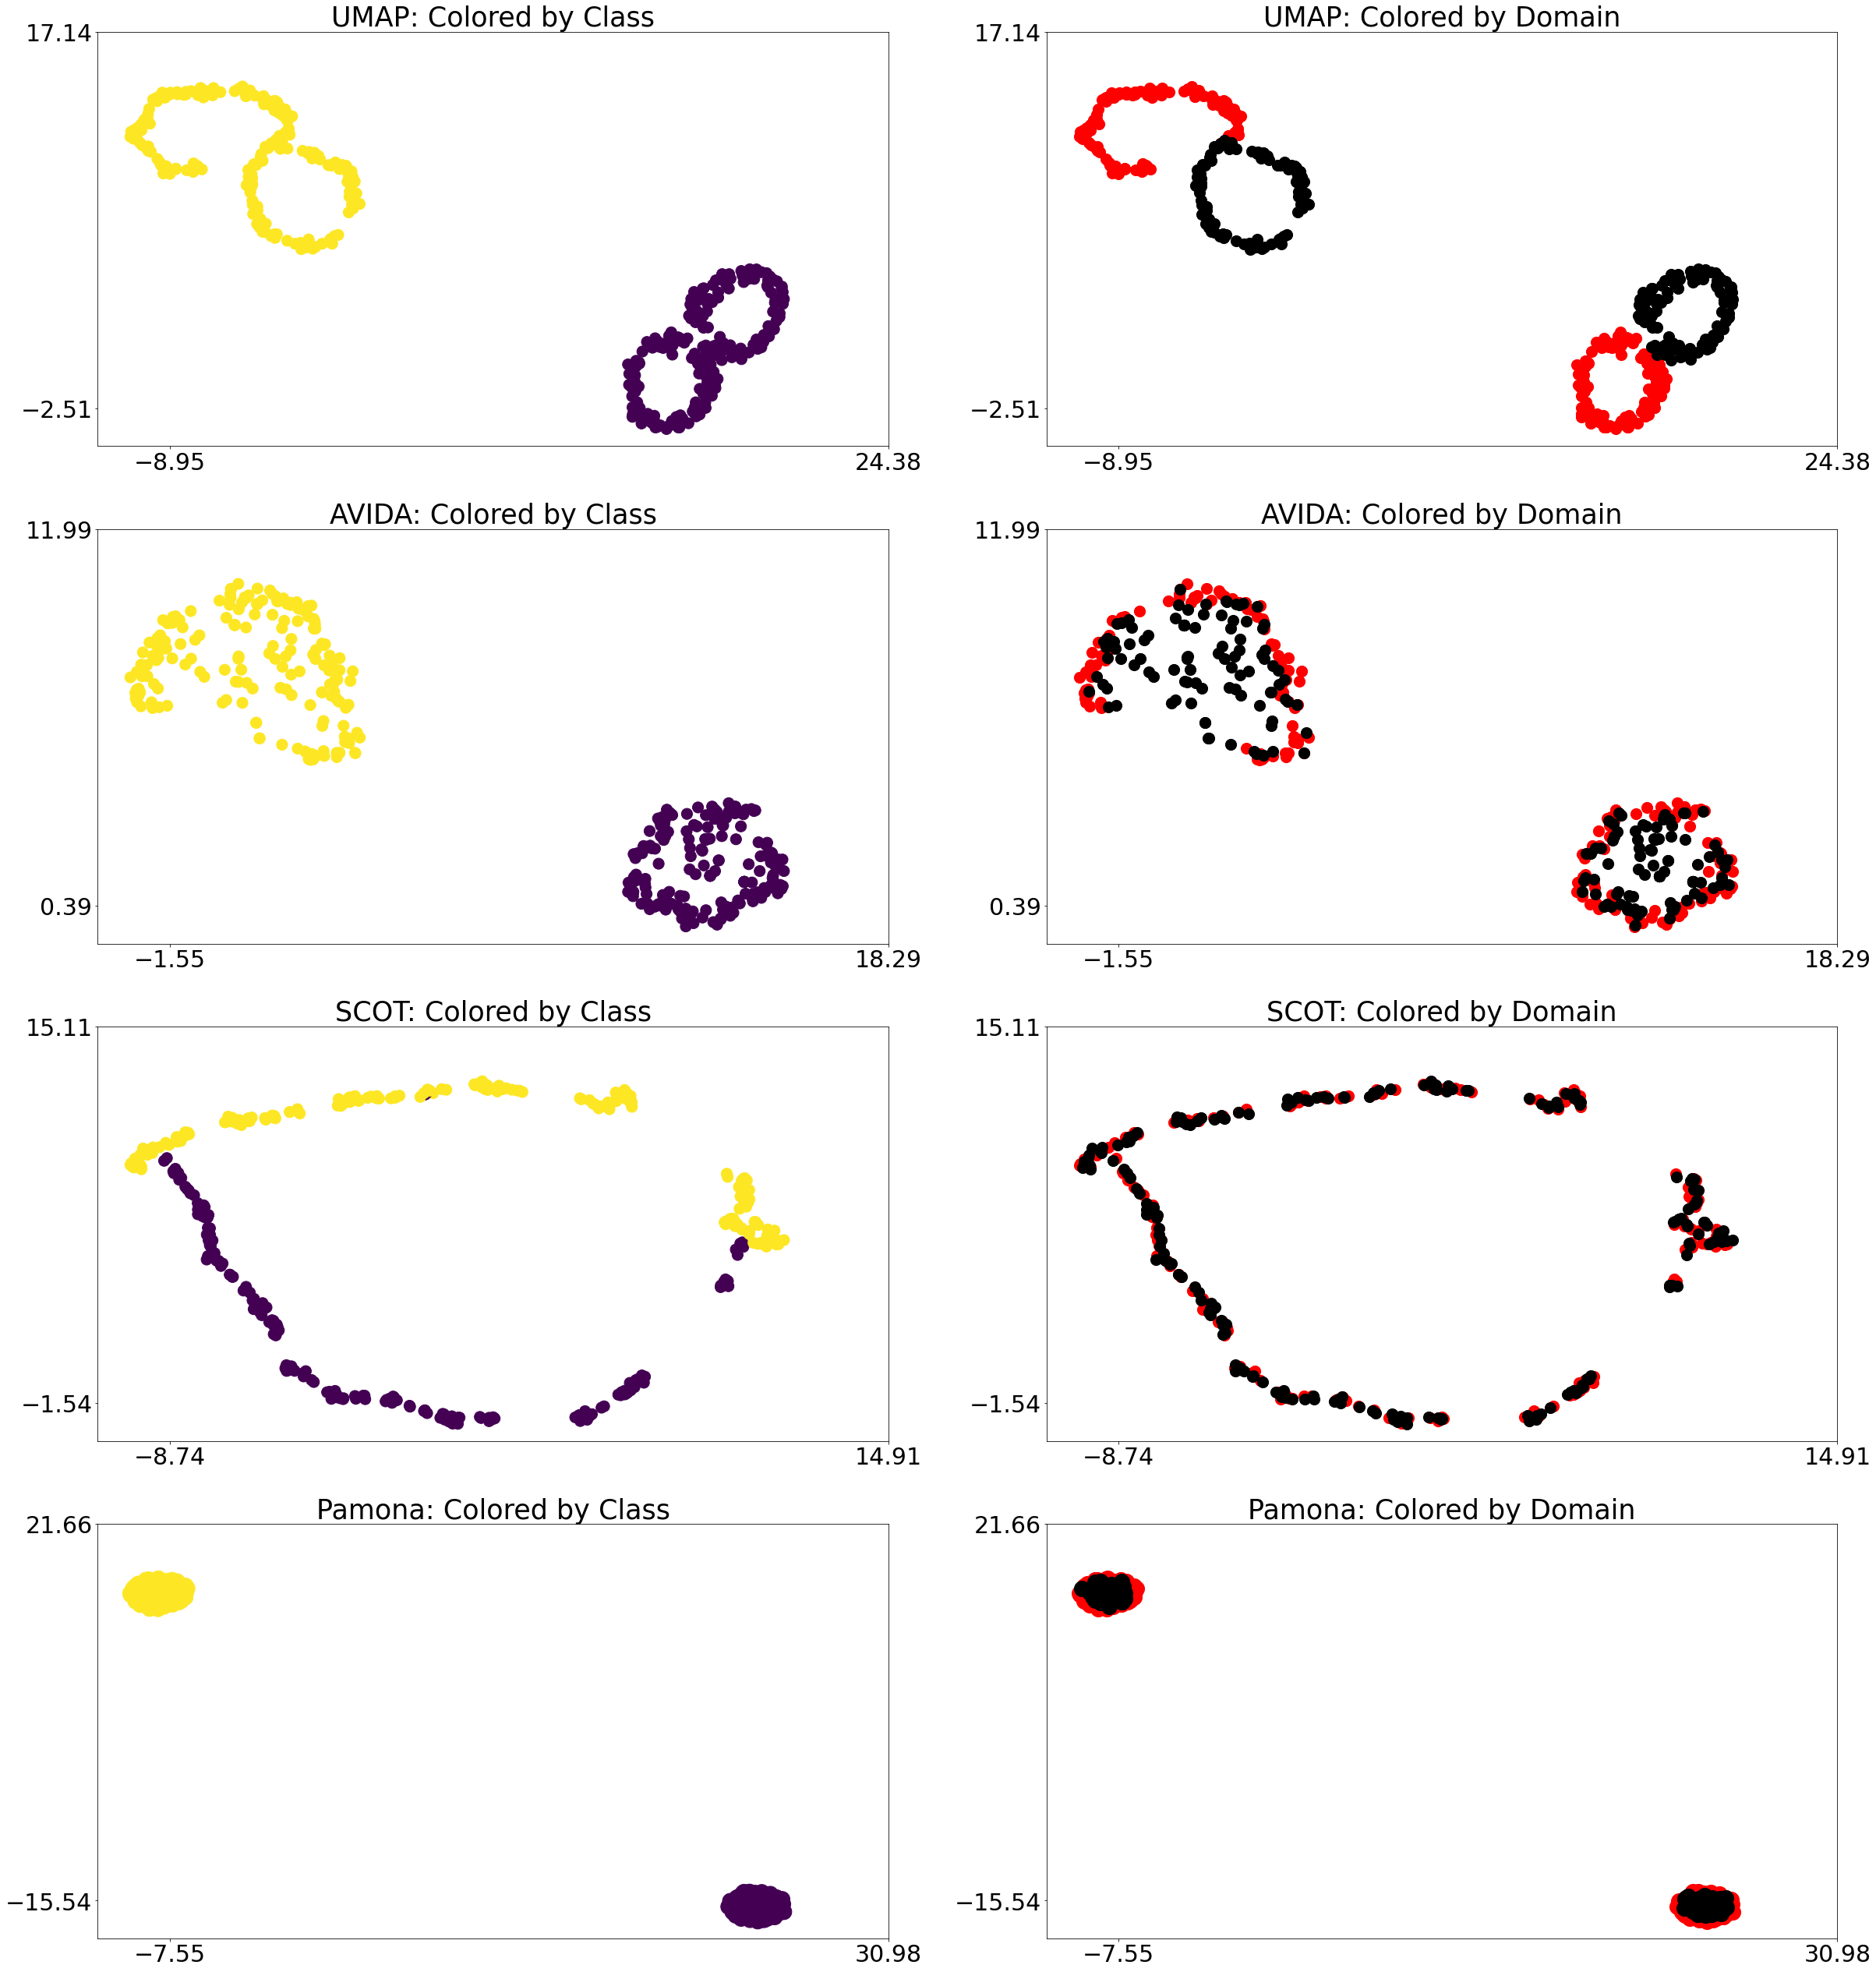

In [13]:
tick_font_size=30
title_font_size=35
dot_size = 200

fig, axs = plt.subplots(4,2)
fig.set_size_inches(40,45)

axs[0,0].scatter(tY2[:,0],tY2[:,1],c=labels_1,s=dot_size)
axs[0,0].scatter(tY1[:,0],tY1[:,1],c=labels_2,s=dot_size)
start_x, end_x = axs[0,0].get_xlim()
start_y, end_y = axs[0,0].get_ylim()
step_size_x = (end_x-start_x)
step_size_y = (end_y-start_y)
axs[0,0].xaxis.set_ticks(np.arange((start_x+step_size_x/10), (end_x+5), step_size_x))
axs[0,0].yaxis.set_ticks(np.arange((start_y+step_size_y/10), (end_y+5), step_size_y))
for label in (axs[0,0].get_xticklabels() + axs[0,0].get_yticklabels()):
	label.set_fontsize(tick_font_size)
axs[0,0].set_title("UMAP: Colored by Class",fontsize=title_font_size)

axs[0,1].scatter(tY2[:,0],tY2[:,1],c='r',s=dot_size)
axs[0,1].scatter(tY1[:,0],tY1[:,1],c='k',s=dot_size)
start_x, end_x = axs[0,1].get_xlim()
start_y, end_y = axs[0,1].get_ylim()
step_size_x = (end_x-start_x)
step_size_y = (end_y-start_y)
axs[0,1].xaxis.set_ticks(np.arange((start_x+step_size_x/10), (end_x+5), step_size_x))
axs[0,1].yaxis.set_ticks(np.arange((start_y+step_size_y/10), (end_y+5), step_size_y))
for label in (axs[0,1].get_xticklabels() + axs[0,1].get_yticklabels()):
	label.set_fontsize(tick_font_size)
axs[0,1].set_title("UMAP: Colored by Domain",fontsize=title_font_size)

axs[1,0].scatter(Y2[:,0],Y2[:,1],c=labels_1,s=dot_size)
axs[1,0].scatter(Y1[:,0],Y1[:,1],c=labels_2,s=dot_size)
start_x, end_x = axs[1,0].get_xlim()
start_y, end_y = axs[1,0].get_ylim()
step_size_x = (end_x-start_x)
step_size_y = (end_y-start_y)
axs[1,0].xaxis.set_ticks(np.arange((start_x+step_size_x/10), (end_x+step_size_x/5), step_size_x))
axs[1,0].yaxis.set_ticks(np.arange((start_y+step_size_y/10), (end_y+step_size_y/5), step_size_y))
for label in (axs[1,0].get_xticklabels() + axs[1,0].get_yticklabels()):
	label.set_fontsize(tick_font_size)
axs[1,0].set_title("AVIDA: Colored by Class",fontsize=title_font_size)

axs[1,1].scatter(Y2[:,0],Y2[:,1],c='r',s=dot_size)
axs[1,1].scatter(Y1[:,0],Y1[:,1],c='k',s=dot_size)
start_x, end_x = axs[1,1].get_xlim()
start_y, end_y = axs[1,1].get_ylim()
step_size_x = (end_x-start_x)
step_size_y = (end_y-start_y)
axs[1,1].xaxis.set_ticks(np.arange((start_x+step_size_x/10), (end_x+step_size_x/5), step_size_x))
axs[1,1].yaxis.set_ticks(np.arange((start_y+step_size_y/10), (end_y+step_size_y/5), step_size_y))
for label in (axs[1,1].get_xticklabels() + axs[1,1].get_yticklabels()):
	label.set_fontsize(tick_font_size)
axs[1,1].set_title("AVIDA: Colored by Domain",fontsize=title_font_size)

axs[2,0].scatter(scot_X_umap[:,0], scot_X_umap[:,1],c=labels_1,s=dot_size)
axs[2,0].scatter(scot_y_umap[:,0], scot_y_umap[:,1],c=labels_2,s=dot_size)
start_x, end_x = axs[2,0].get_xlim()
start_y, end_y = axs[2,0].get_ylim()
step_size_x = (end_x-start_x)
step_size_y = (end_y-start_y)
axs[2,0].xaxis.set_ticks(np.arange((start_x+step_size_x/10), (end_x+step_size_x/5), step_size_x))
axs[2,0].yaxis.set_ticks(np.arange((start_y+step_size_y/10), (end_y+step_size_y/5), step_size_y))
for label in (axs[2,0].get_xticklabels() + axs[2,0].get_yticklabels()):
	label.set_fontsize(tick_font_size)
axs[2,0].set_title("SCOT: Colored by Class",fontsize=title_font_size)

axs[2,1].scatter(scot_X_umap[:,0], scot_X_umap[:,1],c='r',s=dot_size)
axs[2,1].scatter(scot_y_umap[:,0], scot_y_umap[:,1],c='k',s=dot_size)
start_x, end_x = axs[2,1].get_xlim()
start_y, end_y = axs[2,1].get_ylim()
step_size_x = (end_x-start_x)
step_size_y = (end_y-start_y)
axs[2,1].xaxis.set_ticks(np.arange((start_x+step_size_x/10), (end_x+step_size_x/5), step_size_x))
axs[2,1].yaxis.set_ticks(np.arange((start_y+step_size_y/10), (end_y+step_size_y/5), step_size_y))
for label in (axs[2,1].get_xticklabels() + axs[2,1].get_yticklabels()):
	label.set_fontsize(tick_font_size)
axs[2,1].set_title("SCOT: Colored by Domain",fontsize=title_font_size)

axs[3,0].scatter(integrated_data[0][:,0], integrated_data[0][:,1],c=labels_1,s=2*dot_size)
axs[3,0].scatter(integrated_data[1][:,0], integrated_data[1][:,1],c=labels_2,s=2*dot_size)
start_x, end_x = axs[3,0].get_xlim()
start_y, end_y = axs[3,0].get_ylim()
step_size_x = (end_x-start_x)
step_size_y = (end_y-start_y)
axs[3,0].xaxis.set_ticks(np.arange((start_x+step_size_x/10), (end_x+step_size_x/5), step_size_x))
axs[3,0].yaxis.set_ticks(np.arange((start_y+step_size_y/10), (end_y+step_size_y/5), step_size_y))
for label in (axs[3,0].get_xticklabels() + axs[3,0].get_yticklabels()):
	label.set_fontsize(tick_font_size)
axs[3,0].set_title("Pamona: Colored by Class",fontsize=title_font_size)


axs[3,1].scatter(integrated_data[0][:,0], integrated_data[0][:,1],c='r',s=2*dot_size)
axs[3,1].scatter(integrated_data[1][:,0], integrated_data[1][:,1],c='k',s=2*dot_size)
start_x, end_x = axs[3,1].get_xlim()
start_y, end_y = axs[3,1].get_ylim()
step_size_x = (end_x-start_x)
step_size_y = (end_y-start_y)
axs[3,1].xaxis.set_ticks(np.arange((start_x+step_size_x/10), (end_x+step_size_x/5), step_size_x))
axs[3,1].yaxis.set_ticks(np.arange((start_y+step_size_y/10), (end_y+step_size_y/5), step_size_y))
for label in (axs[3,1].get_xticklabels() + axs[3,1].get_yticklabels()):
	label.set_fontsize(tick_font_size)
axs[3,1].set_title("Pamona: Colored by Domain",fontsize=title_font_size)